<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:170%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#f17d8e;
            background-color:#f6abb6;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Data Analysis</a>
        </li>
        <li>
            <a href="#3" style="color:black">3 -  Data Preprocessing</a>
            <ul>
                <li>
                    <a href="#3-1" style="color:black">3.1 -  Drop Eye Center missing coordinates</a>
                </li>
                <li>
                    <a href="#3-2" style="color:black">3.2 - Impute missing values</a>
                </li>
                <li>
                    <a href="#3-3" style="color:black">3.3 - Visualize our imputations</a>
            </ul>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Model Training</a>
        </li>
        <li>
            <a href="#5" style="color:black">5 - Evaluation</a>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Thank You</a>
        </li>
    </ul>
</div>
<a id="1"></a>

<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import BatchNormalization,Dense,Conv2D,Input,MaxPooling2D,Dropout,Flatten,LeakyReLU
from tensorflow.keras.optimizers import Adam

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

## Loading Data

In [2]:
os.listdir('../input/face-images-with-marked-landmark-points/')

['facial_keypoints.csv', 'face_images.npz']

In [3]:
df =  pd.read_csv('../input/face-images-with-marked-landmark-points/facial_keypoints.csv')

In [4]:
with np.load('../input/face-images-with-marked-landmark-points/face_images.npz') as data:
    images = data['face_images']

In [5]:
images = np.swapaxes(np.swapaxes(images, 1, 2), 0, 1)

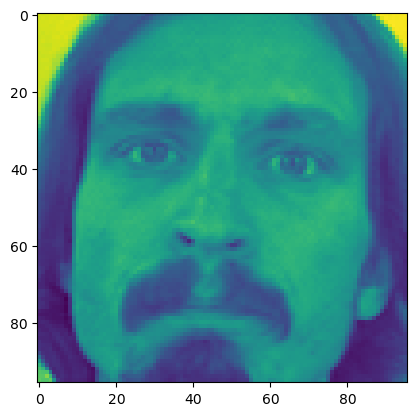

In [6]:
plt.imshow(images[0])

In [7]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,65.082895,66.497566,68.024752,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,35.900451,37.528055,39.258449,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,28.783339,30.251378,31.768334,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,36.327681,37.813273,39.566729,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,58.039339,59.304615,60.519810,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,36.626283,37.878040,39.260348,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,71.716503,73.247824,75.015645,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,36.085523,37.639015,39.373489,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,35.506126,36.651562,37.753571,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,36.766783,37.944075,39.192917,69.808803


In [9]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

<div class="alert alert-block alert-info">
<b>Conclusion:</b> A significant proportion of data is currently unavailable and will require further attention at a later stage.
</div>

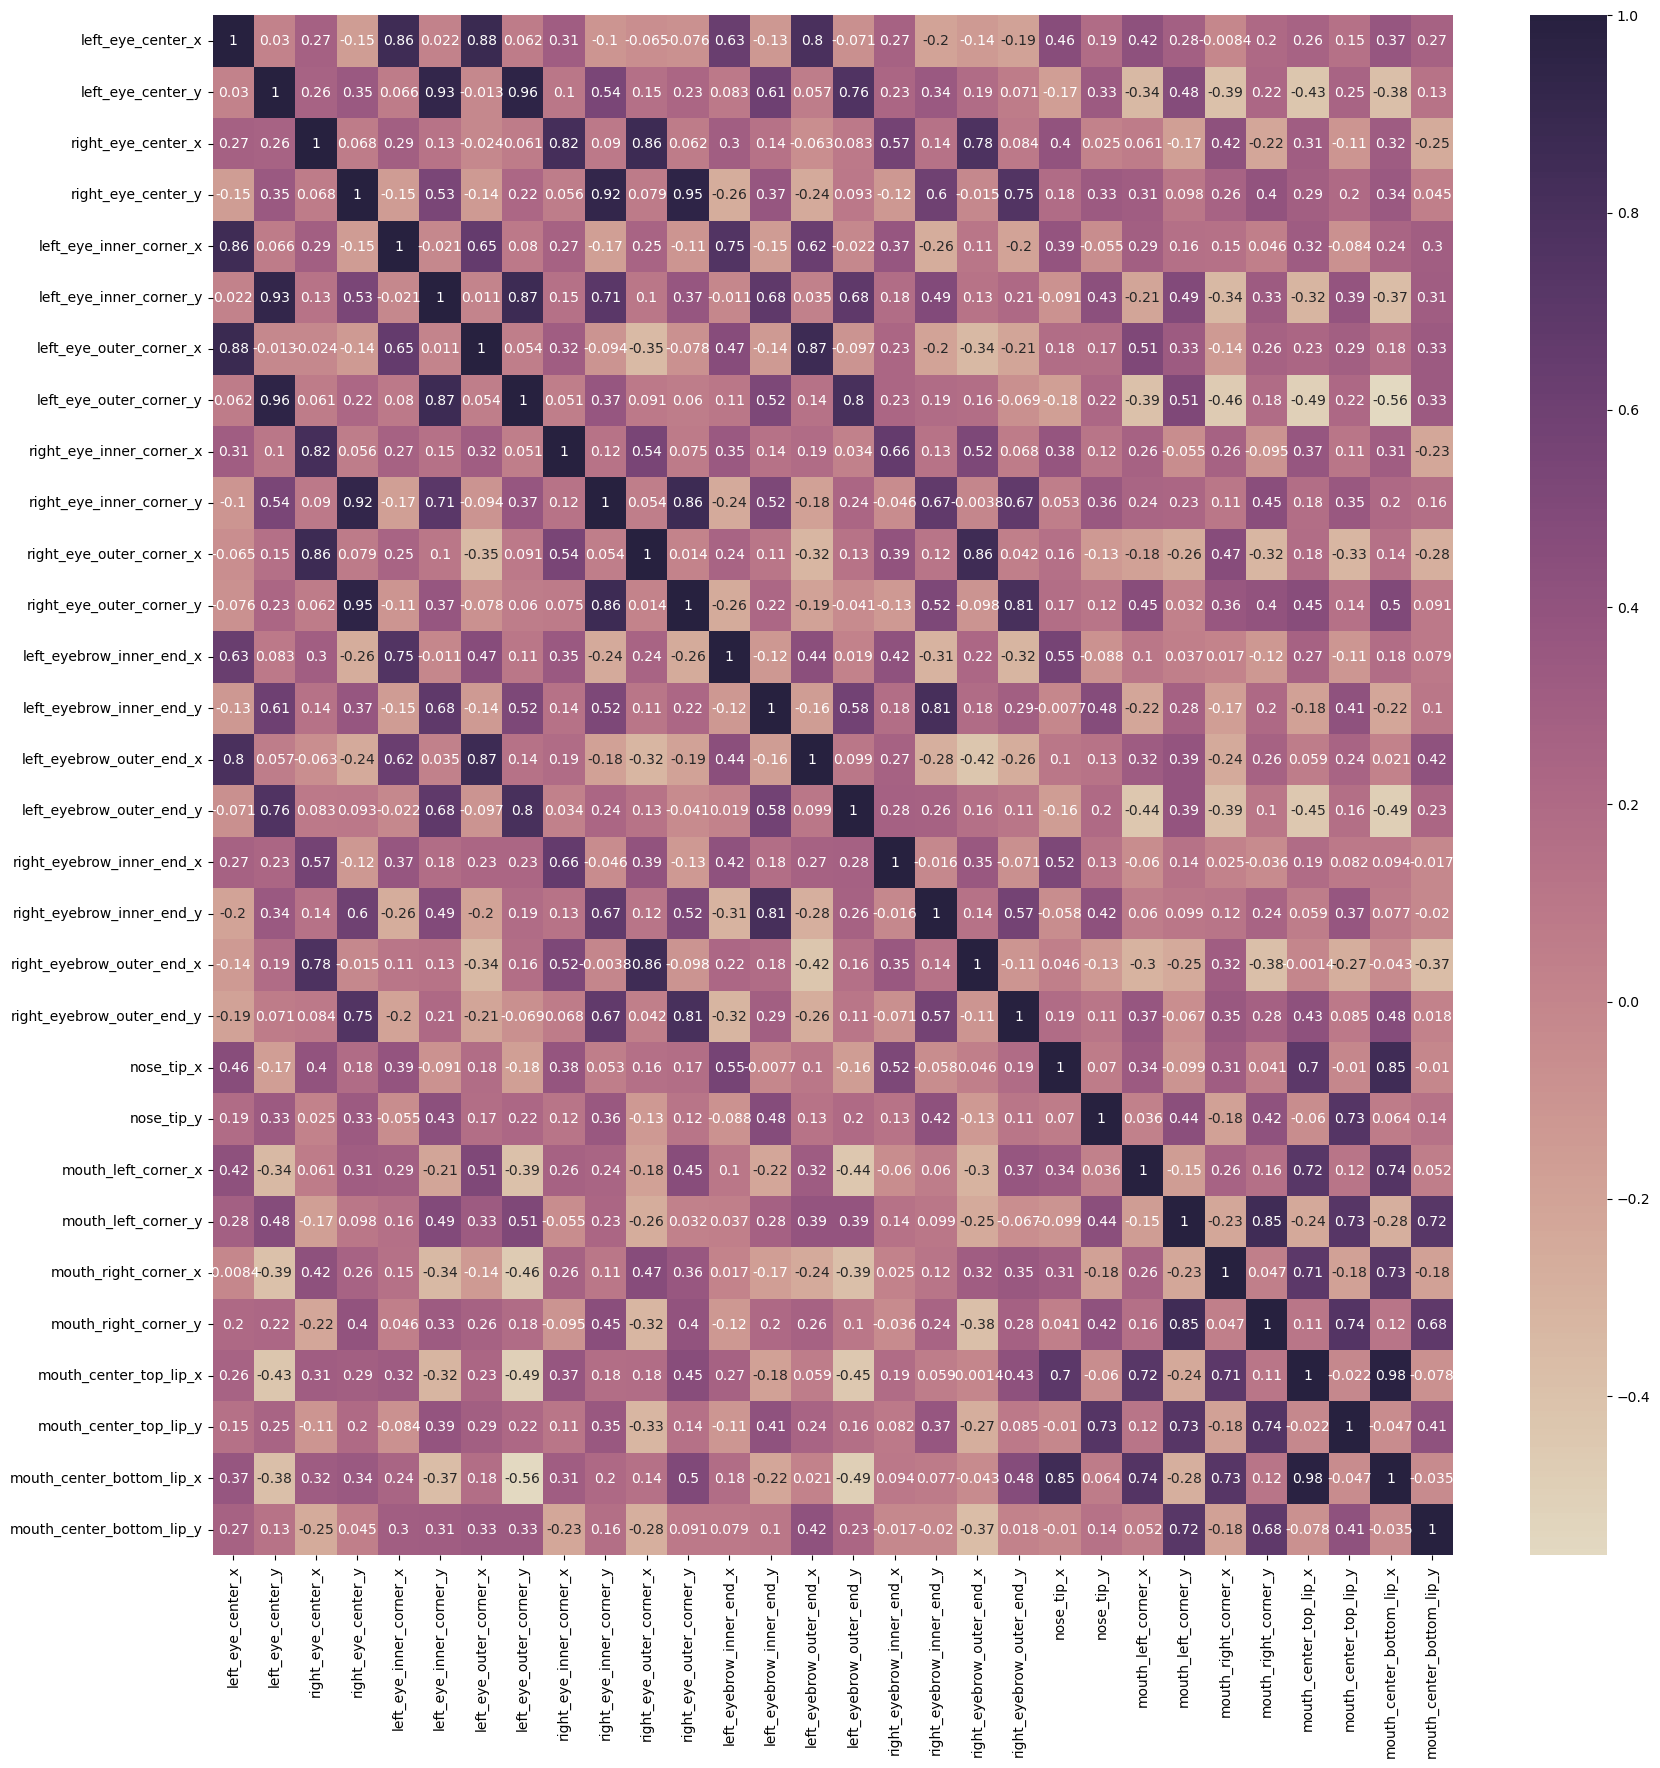

In [10]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Conclusion:</b> Our analysis indicates that a high degree of correlation exists among several features, and we can leverage this information to address the issue of missing data through the use of a K-Nearest Neighbor (KNN) imputation technique.
</div>

<a id="3"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>
    
# Data Preprocessing

<a name="3-1"></a>
## Drop Eye Center missing coordinates

**It seems that Eye Center Coordinates have a very small number of missing values. In such a case, it might be advisable to simply drop those rows from the dataset, rather than trying to impute them**

In [11]:
null_rows = df[['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y']].isnull().any(axis=1)
null_indices = null_rows[null_rows].index

In [12]:
images = np.delete(images, null_indices, axis=0)
df = df.dropna(subset=['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y'], how='any')

<a name="3-2"></a>
## Impute missing values

In [13]:
# Split the dataset into two parts
df_non_missing = df.dropna()
df_missing = df.loc[df.isna().any(axis=1)]

# Normalize the non-missing part of the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_non_missing)

# Fit the KNN imputer model on the normalized data
imputer = KNNImputer(n_neighbors=11)
imputer.fit(df_scaled)

# Normalize the missing part of the dataset and impute the missing values
df_missing_scaled = scaler.transform(df_missing)
df_missing_imputed = imputer.transform(df_missing_scaled)

# Combine the imputed and non-missing parts of the dataset
df_imputed = scaler.inverse_transform(df_missing_imputed)
df_combined = pd.concat([df_non_missing, pd.DataFrame(df_imputed, columns=df.columns)])


In [14]:
# Extract the eye coordinates from the dataset
left_eye_center = (df_combined['left_eye_center_x'], df_combined['left_eye_center_y'])
right_eye_center = (df_combined['right_eye_center_x'], df_combined['right_eye_center_y'])
left_eye_inner_corner = (df_combined['left_eye_inner_corner_x'], df_combined['left_eye_inner_corner_y'])
left_eye_outer_corner = (df_combined['left_eye_outer_corner_x'], df_combined['left_eye_outer_corner_y'])
right_eye_inner_corner = (df_combined['right_eye_inner_corner_x'], df_combined['right_eye_inner_corner_y'])
right_eye_outer_corner = (df_combined['right_eye_outer_corner_x'], df_combined['right_eye_outer_corner_y'])

left_eye_points = np.array([left_eye_inner_corner, left_eye_center, left_eye_outer_corner])
right_eye_points = np.array([right_eye_inner_corner, right_eye_center, right_eye_outer_corner])

eye_points = np.concatenate([left_eye_points, right_eye_points], axis=0)


<a name="3-3"></a>
## Visualize our imputations

In [15]:
def plot_points(img, points):
    """
    Draws circles at the specified points on the input image.

    Args:
    - img (ndarray): The input image
    - points (list): A list of points to draw on the image, where each point is a tuple of (x,y) coordinates

    Returns:
    - The modified image with circles drawn at the specified points.

    """

    # Convert the input points to a numpy array with integer data type
    points = np.array(points, dtype=np.int32)

    # Make a copy of the input image
    img = img.copy()

    # Draw a circle at each specified point
    for point in points:
        cv2.circle(img, point, radius=0, color=(255, 255, 255), thickness=1)

    # Return the modified image
    return img


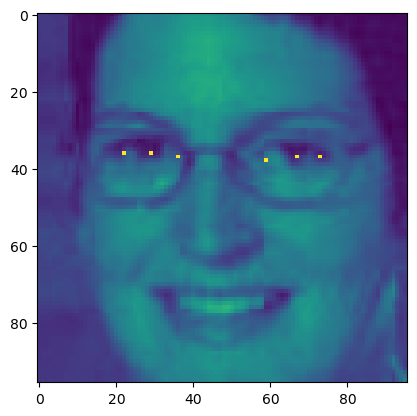

In [16]:
points = eye_points[:,:,3000]
img = plot_points(images[3000],points)
plt.imshow(img)

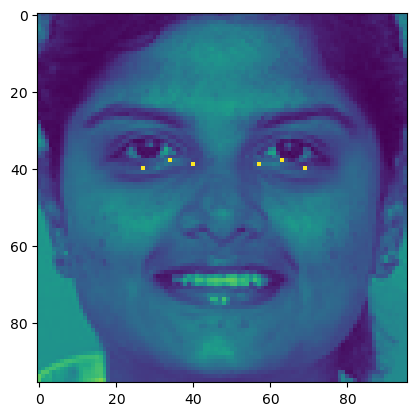

In [17]:
points = eye_points[:,:,1900]
img = plot_points(images[1900],points)
plt.imshow(img)

<div class="alert alert-block alert-info">
<b>Conclusion:</b> It appears that although some of the imputed values are accurate, others may be slightly incorrect, which could potentially introduce errors during the training process.
</div>

## Prepare the data for model

In [18]:
images = np.expand_dims(images,axis=-1)

In [19]:
eye_points = eye_points.transpose((2, 0, 1)).reshape((7033, 12))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, eye_points, test_size=0.2, random_state=42)

<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Training</center></h1>
    
# Model Training

In [21]:
inputs = Input(shape=(96, 96, 1))
x = BatchNormalization()(inputs)
x = Conv2D(128, (3,3), padding="same",kernel_initializer=glorot_uniform(),activation=LeakyReLU(0.1))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = BatchNormalization()(x)
x = Conv2D(256, (3,3), padding="same",kernel_initializer=glorot_uniform(), activation=LeakyReLU(0.1))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = BatchNormalization()(x)
x = Conv2D(512, (3,3), padding="same",kernel_initializer=glorot_uniform(), activation=LeakyReLU(0.1))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x =  Dense(1028, kernel_initializer=glorot_uniform(), activation=LeakyReLU(0.1))(x)
x = Dropout(0.5)(x)
x =  Dense(64, kernel_initializer=glorot_uniform(), activation=LeakyReLU(0.1))(x)
x =  Dense(12, kernel_initializer=glorot_uniform())(x)

model = Model(inputs = inputs, outputs=x)

In [22]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=7.1361e-06), metrics=['mean_squared_error'])

In [23]:
def scheduler(epoch, lr):
    """
    Parameters:

        epoch: (integer) representing the current epoch number
        lr: (float) number representing the current learning rate value
    Returns:

        A new floating point number representing the updated learning rate value.
    """
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.09)

    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [24]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=60,
    validation_data=(X_test, y_test)
    ,callbacks=[callback])


Epoch 1/60
44/44 [==============================] - 15s 164ms/step - loss: 897.3079 - mean_squared_error: 897.3079 - val_loss: 1701.2823 - val_mean_squared_error: 1701.2823 - lr: 7.1361e-06
Epoch 2/60
44/44 [==============================] - 6s 133ms/step - loss: 191.7268 - mean_squared_error: 191.7268 - val_loss: 1052.4529 - val_mean_squared_error: 1052.4529 - lr: 7.1361e-06
Epoch 3/60
44/44 [==============================] - 6s 132ms/step - loss: 112.5077 - mean_squared_error: 112.5077 - val_loss: 631.4301 - val_mean_squared_error: 631.4301 - lr: 7.1361e-06
Epoch 4/60
44/44 [==============================] - 6s 133ms/step - loss: 92.5845 - mean_squared_error: 92.5845 - val_loss: 404.6296 - val_mean_squared_error: 404.6296 - lr: 7.1361e-06
Epoch 5/60
44/44 [==============================] - 6s 133ms/step - loss: 80.4039 - mean_squared_error: 80.4039 - val_loss: 260.4828 - val_mean_squared_error: 260.4828 - lr: 7.1361e-06
Epoch 6/60
44/44 [==============================] - 6s 137ms/ste

<a id="5"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'> Evaluation</center></h1>
    
# Evaluation

**As a significant proportion of the data had to be imputed, the results obtained may be somewhat noisy. Therefore, it is necessary to evaluate the results obtained.**

In [25]:
def predict(X, model):
    """
    Predicts the class probabilities for the input X using the given model
    and visualizes the result using a plot.

    Args:
    - X (ndarray): Input data of shape (n_features,)
    - model: The trained model to use for prediction

    Returns:
    - None

    """
    # Expand the dimensions of the input to (1, n_features)
    X_expanded = np.expand_dims(X, axis=0)

    # Use the model to make a prediction on the input
    predictions = model.predict(X_expanded)

    # Reshape the predictions to match the expected output shape
    predictions = predictions.reshape((6, 2))

    # Plot the input and the predicted class probabilities
    img = plot_points(X, predictions)
    plt.imshow(img)

1/1 [==============================] - 0s 232ms/step


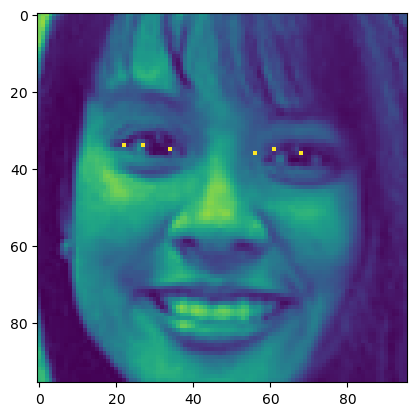

In [26]:
predict(X_train[0], model)

1/1 [==============================] - 0s 16ms/step


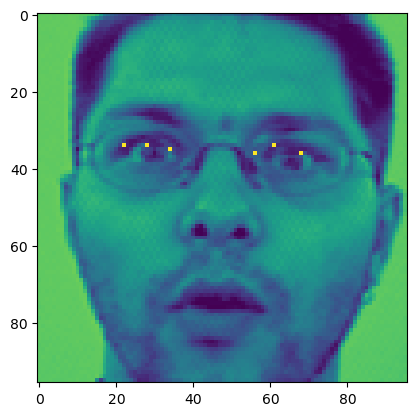

In [27]:
predict(X_test[0], model)

1/1 [==============================] - 0s 17ms/step


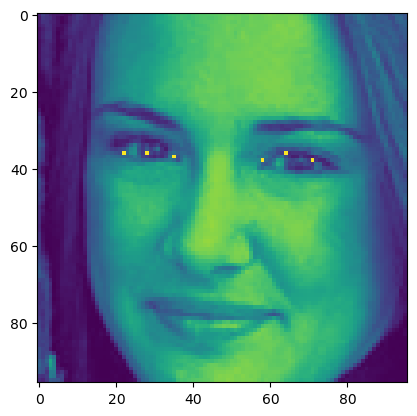

In [28]:
predict(X_test[200], model)

1/1 [==============================] - 0s 16ms/step


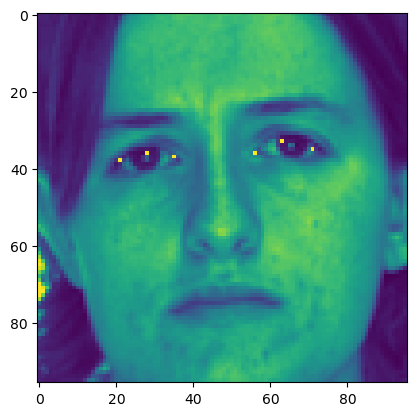

In [29]:
predict(X_train[200], model)

<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
# Thank You


**Thank you  for going through  this notebook**

**If you have any feedback please let me know**

